In [1]:
import itertools
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure

import glob

from datetime import datetime

import statsmodels.api as sm




In [2]:
from datetime import datetime, timedelta

In [63]:
from IPython.display import display, Markdown

In [3]:
def read_file_to_df(path):
    all_files = glob.glob(path + '/*.csv')
    df = pd.DataFrame()
    for filename in all_files:
        temp = pd.read_csv(filename)
        df = pd.concat([df, temp])
    return df

In [4]:
de_rompert = read_file_to_df('./data/den bosch/sewer_data_db/flow/de Rompert/')
bokhoven = read_file_to_df('./data/den bosch/sewer_data_db/flow/Bokhoven/')
haarsteeg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Haarsteeg/')
helftheuvelweg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Helftheuvelweg/')
maaspoort = read_file_to_df('./data/den bosch/sewer_data_db/flow/Maaspoort/')
oud_engelseweg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Oud Engelseweg/')
engelerschans = read_file_to_df('./data/den bosch/sewer_data_db/flow/Engelerschans/')

C:\Users\s162378\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
def fix_data(data, name_of_pump):
    data = data[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
    data = data.rename(columns = {'hstWaarde' : '{}'.format(name_of_pump)})
    data['datetime'] = pd.to_datetime(data['datumBeginMeting'], format = '%Y-%m-%d %H:%M:%S')
    data['datumBeginMeting'] = pd.to_datetime(data['datumBeginMeting'], format='%Y-%m-%d %H:%M:%S')
    data['datumEindeMeting'] = pd.to_datetime(data['datumEindeMeting'], format='%Y-%m-%d %H:%M:%S')
    data = data.set_index('datumBeginMeting')
    data = data.sort_index() # Datetime index
    return data

de_rompert2 = fix_data(de_rompert, 'de_rompert')
bokhoven2 = fix_data(bokhoven, 'bokhoven')
haarsteeg2 = fix_data(haarsteeg, 'haarsteeg')
helftheuvelweg2 = fix_data(helftheuvelweg, 'helftheuvelweg')
oud_engelseweg2 = fix_data(oud_engelseweg, 'oud_engelseweg')
engelerschans2 = fix_data(engelerschans, 'engelerschans')
maaspoort2 = fix_data(maaspoort, 'maaspoort')


In [64]:
def only_changed_rows(df, give_index=False, silent=False):
    changed_elements_index = df.shift() != df
    
    if not silent: # Print amount of changed rows message:
        total = df.shape[0]
        remaining = changed_elements_index.any(axis=1).sum()
        display(Markdown(f"Of **{total:,}** rows, **{total-remaining:,} ({(total-remaining)/total:.2%})**\
        were found to be consecutive duplicates. \n**{remaining:,}** rows remaining."))
    
    return changed_elements_index if give_index else df.loc[changed_elements_index.any(axis=1)]

In [65]:
de_rompert2 = only_changed_rows(de_rompert2)
de_rompert2.head()

Of **829,320** rows, **20 (0.00%)**        were found to be consecutive duplicates. 
**829,300** rows remaining.

,datumEindeMeting,de_rompert,datetime
datumBeginMeting,,,
2018-01-01 00:00:00,2018-01-01 00:01:00,0.0,2018-01-01 00:00:00
2018-01-01 00:01:00,2018-01-01 00:02:00,0.0,2018-01-01 00:01:00
2018-01-01 00:02:00,2018-01-01 00:03:00,0.0,2018-01-01 00:02:00
2018-01-01 00:03:00,2018-01-01 00:04:00,0.0,2018-01-01 00:03:00
2018-01-01 00:04:00,2018-01-01 00:05:00,0.0,2018-01-01 00:04:00


In [66]:
def first_non_zero(data, name):
    s = pd.Series(data[name])
    f = pd.DataFrame(s.iloc[s.nonzero()[0]]).reset_index()

    m_index = f['datumBeginMeting'][0]
    print(m_index)
    data3 = data.loc[m_index:,:]
    data3[name].plot()
    return data3



2018-04-19 10:40:00


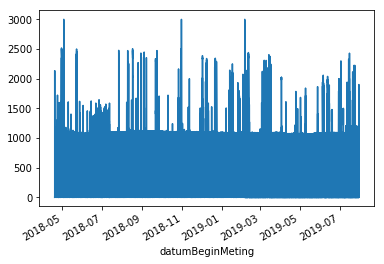

In [67]:
de_rompert3 = first_non_zero(de_rompert2, 'de_rompert')


2018-01-01 00:00:00


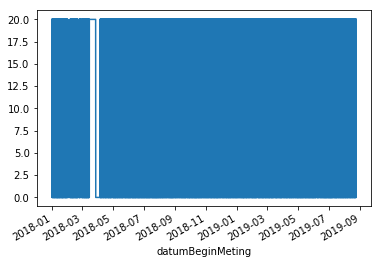

In [8]:
bokhoven3 = first_non_zero(bokhoven2, 'bokhoven')


2018-01-01 00:00:00


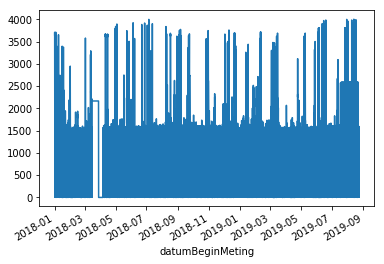

In [9]:
haarsteeg3 = first_non_zero(haarsteeg2, 'haarsteeg')


2018-01-01 00:00:00


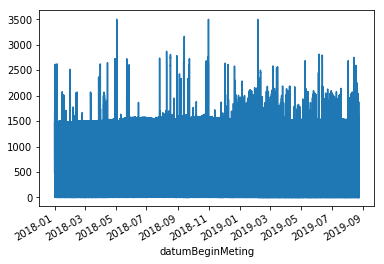

In [10]:
helftheuvelweg3 = first_non_zero(helftheuvelweg2, 'helftheuvelweg')


2018-04-17 13:13:00


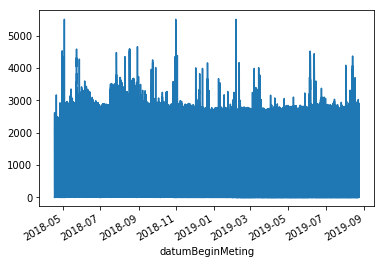

In [11]:
oud_engelseweg3 = first_non_zero(oud_engelseweg2, 'oud_engelseweg')


2018-01-01 00:00:00


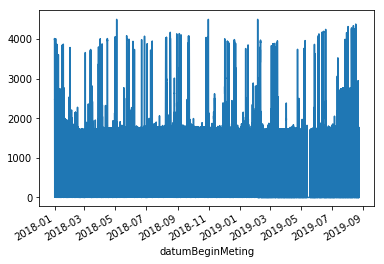

In [12]:
engelerschans3 = first_non_zero(engelerschans2, 'engelerschans')


2018-04-19 10:40:00


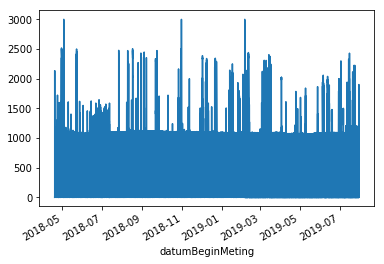

In [13]:
maaspoort3 = first_non_zero(maaspoort2, 'maaspoort')


In [14]:
def dry_df(df):
    df = pd.read_csv(df, sep="\n", header=None)
    df.columns = ["a"]
    df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
    df = df[['datetime']]
    return df

dry_rompert = dry_df('dry_rompert')
dry_bokhoven = dry_df('dry_bokhoven')
dry_haarsteeg = dry_df('dry_haarsteeg')
dry_helftheuvelweg = dry_df('dry_helftheuvelweg')
dry_maaspoort = dry_df('dry_maaspoort')
dry_oudengelseweg = dry_df('dry_oudengelseweg')


In [15]:
def whole_df(df):
    df = pd.read_csv('./data/den bosch/whole map/' + df + '.csv', sep="," or "\n")
    df = df.iloc[:,1:3].rename(columns = {'Begin':'Datetime', df.columns[2]:'Rain'})
    
    df = df.set_index(pd.to_datetime(df['Datetime'], format = '%Y-%m-%d %H:%M:%S'))
    df['Rain'] = df['Rain'] * 10000
    df = df.groupby(pd.TimeGrouper('H'))['Rain'].sum()

#     df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
#     df = df.set_index(df['datetime'])
    return df

whole_rompert = whole_df('whole_rompert')
whole_bokhoven = whole_df('whole_bokhoven')
whole_haarsteeg = whole_df('whole_haarsteeg')
whole_helftheuvelweg = whole_df('whole_helftheuvelweg')
whole_maaspoort = whole_df('whole_maaspoort')
whole_oudengelseweg = whole_df('whole_oudengelseweg')


C:\Users\s162378\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


In [16]:
whole_rompert.head()



Datetime
2017-12-31 23:00:00       0.0
2018-01-01 00:00:00       0.0
2018-01-01 01:00:00     328.0
2018-01-01 02:00:00    2261.0
2018-01-01 03:00:00    2897.0
Freq: H, Name: Rain, dtype: float64

In [82]:
de_rompert4 = de_rompert3.groupby(pd.TimeGrouper('H'))['de_rompert'].mean()
bokhoven4 = bokhoven3.groupby(pd.TimeGrouper('H'))['bokhoven'].mean()
haarsteeg4 = haarsteeg3.groupby(pd.TimeGrouper('H'))['haarsteeg'].mean()
helftheuvelweg4 = helftheuvelweg3.groupby(pd.TimeGrouper('H'))['helftheuvelweg'].mean()
maaspoort4 = maaspoort3.groupby(pd.TimeGrouper('H'))['maaspoort'].mean()
oud_engelseweg4 = oud_engelseweg3.groupby(pd.TimeGrouper('H'))['oud_engelseweg'].mean()



C:\Users\s162378\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
C:\Users\s162378\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\Users\s162378\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\s162378\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.
C:\Users\s162378\AppData\Local\Continuum\anaconda3\lib\site-p

In [83]:
def filterDryDays(data, dry, name_of_pump):
    data = pd.DataFrame(data)
    dry = np.where(data.index.isin(dry['datetime']), 1, 0)
    data['dry'] = dry
    #data = data[data['dry'] == 1]
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

de_rompert5 = filterDryDays(de_rompert4, dry_rompert, 'de_rompert')
bokhoven5 = filterDryDays(bokhoven4, dry_bokhoven, 'bokhoven')
haarsteeg5 = filterDryDays(haarsteeg4, dry_haarsteeg, 'haarsteeg')
helftheuvelweg5 = filterDryDays(helftheuvelweg4, dry_helftheuvelweg, 'helftheuvelweg')
maaspoort5 = filterDryDays(maaspoort4, dry_maaspoort, 'maaspoort')
oud_engelseweg5 = filterDryDays(oud_engelseweg4, dry_oudengelseweg, 'oud_engelseweg')



In [84]:
de_rompert5.shape

(11222, 2)

In [85]:
de_rompert4.shape

(11222,)

In [86]:
de_rompert5

,de_rompert,dry
datumBeginMeting,,
2018-04-19 10:00:00,1.700000,0
2018-04-19 11:00:00,1.730000,0
2018-04-19 12:00:00,1058.610000,0
2018-04-19 13:00:00,1392.876667,0
2018-04-19 14:00:00,298.736667,0
2018-04-19 15:00:00,219.748333,0
2018-04-19 16:00:00,212.485000,0
2018-04-19 17:00:00,123.508333,0
2018-04-19 18:00:00,217.166667,0


In [87]:
a = de_rompert5[de_rompert5['dry'] == 1]
b = de_rompert5[de_rompert5['dry'] == 0]
b['de_rompert'] = np.NAN
de_rompert5 = a.append(b).sort_index()

# de_rompert5['de_rompert'] = np.where(data['dry'] == 1,data['de_rompert'] = data['de_rompert'], 'NaN' )

In [146]:
de_rompert6 = de_rompert5['de_rompert'].interpolate(method = 'time')

In [147]:
de_rompert6 = pd.DataFrame(de_rompert6)

In [107]:
de_rompert6.index

DatetimeIndex(['2018-04-19 10:00:00', '2018-04-19 11:00:00',
               '2018-04-19 12:00:00', '2018-04-19 13:00:00',
               '2018-04-19 14:00:00', '2018-04-19 15:00:00',
               '2018-04-19 16:00:00', '2018-04-19 17:00:00',
               '2018-04-19 18:00:00', '2018-04-19 19:00:00',
               ...
               '2019-07-30 14:00:00', '2019-07-30 15:00:00',
               '2019-07-30 16:00:00', '2019-07-30 17:00:00',
               '2019-07-30 18:00:00', '2019-07-30 19:00:00',
               '2019-07-30 20:00:00', '2019-07-30 21:00:00',
               '2019-07-30 22:00:00', '2019-07-30 23:00:00'],
              dtype='datetime64[ns]', name='datumBeginMeting', length=11222, freq=None)

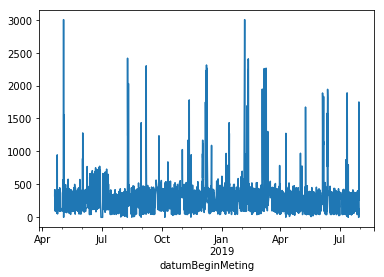

In [90]:
de_rompert6.plot()

In [92]:
de_rompert5['interpolated'] = de_rompert6

In [95]:
de_rompert5['2018-04-21 00:00:00': '2018-04-21 18:00:00']

,de_rompert,dry,interpolated
datumBeginMeting,,,
2018-04-21 00:00:00,282.645000,1,282.645000
2018-04-21 01:00:00,211.720000,1,211.720000
2018-04-21 02:00:00,165.125000,1,165.125000
2018-04-21 03:00:00,NaN,0,180.554615
2018-04-21 04:00:00,NaN,0,195.984231
2018-04-21 05:00:00,NaN,0,211.413846
2018-04-21 06:00:00,NaN,0,226.843462
2018-04-21 07:00:00,NaN,0,242.273077
2018-04-21 08:00:00,NaN,0,257.702692


In [19]:
def joinOnRain(data, whole, name_of_pump):
    whole = pd.DataFrame(whole)
    data = pd.DataFrame(data)
    rain = np.where(whole.index.isin(data.index), 1, 0)
    data = data[data['dry'] == 1]
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

de_rompert5 = filterDryDays(de_rompert4, dry_rompert, 'de_rompert')
bokhoven5 = filterDryDays(bokhoven4, dry_bokhoven, 'bokhoven')
haarsteeg5 = filterDryDays(haarsteeg4, dry_haarsteeg, 'haarsteeg')
helftheuvelweg5 = filterDryDays(helftheuvelweg4, dry_helftheuvelweg, 'helftheuvelweg')
maaspoort5 = filterDryDays(maaspoort4, dry_maaspoort, 'maaspoort')
oud_engelseweg5 = filterDryDays(oud_engelseweg4, dry_oudengelseweg, 'oud_engelseweg')



In [20]:
de_rompert4['rain'] = whole_rompert

In [21]:
de_rompert5 = de_rompert4

Index([2018-04-19 10:00:00, 2018-04-19 11:00:00, 2018-04-19 12:00:00,
       2018-04-19 13:00:00, 2018-04-19 14:00:00, 2018-04-19 15:00:00,
       2018-04-19 16:00:00, 2018-04-19 17:00:00, 2018-04-19 18:00:00,
       2018-04-19 19:00:00,
       ...
       2019-07-30 15:00:00, 2019-07-30 16:00:00, 2019-07-30 17:00:00,
       2019-07-30 18:00:00, 2019-07-30 19:00:00, 2019-07-30 20:00:00,
       2019-07-30 21:00:00, 2019-07-30 22:00:00, 2019-07-30 23:00:00,
                       '1'],
      dtype='object', name='datumBeginMeting', length=11223)

In [148]:
def create_dummies(data, y):
#     data['1'] = np.where(data.index.hour == 0, 1, 0)
#     data['2'] = np.where(data.index.hour == 1, 1, 0)
#     data['3'] = np.where(data.index.hour == 2, 1, 0)
#     data['4'] = np.where(data.index.hour == 3, 1, 0)
#     data['5'] = np.where(data.index.hour == 4, 1, 0)
#     data['6'] = np.where(data.index.hour == 5, 1, 0)
#     data['7'] = np.where(data.index.hour == 6, 1, 0)
#     data['8'] = np.where(data.index.hour == 7, 1, 0)
#     data['9'] = np.where(data.index.hour == 8, 1, 0)
#     data['10'] = np.where(data.index.hour == 9, 1, 0)
#     data['11'] = np.where(data.index.hour == 10, 1, 0)
#     data['12'] = np.where(data.index.hour == 11, 1, 0)
#     data['13'] = np.where(data.index.hour == 12, 1, 0)
#     data['14'] = np.where(data.index.hour == 13, 1, 0)
#     data['15'] = np.where(data.index.hour == 14, 1, 0)
#     data['16'] = np.where(data.index.hour == 15, 1, 0)
#     data['17'] = np.where(data.index.hour == 16, 1, 0)
#     data['18'] = np.where(data.index.hour == 17, 1, 0)
#     data['19'] = np.where(data.index.hour == 18, 1, 0)
#     data['20'] = np.where(data.index.hour == 19, 1, 0)
#     data['21'] = np.where(data.index.hour == 20, 1, 0)
#     data['22'] = np.where(data.index.hour == 21, 1, 0)
#     data['23'] = np.where(data.index.hour == 22, 1, 0)
    
    data['monday'] = np.where(data.index.day == 0, 1, 0)
    data['tuesday'] = np.where(data.index.day == 1, 1, 0)
    data['wednesday'] = np.where(data.index.day == 2, 1, 0)
    data['thursday'] = np.where(data.index.day == 3, 1, 0)
    data['friday'] = np.where(data.index.day == 4, 1, 0)
    data['saturday'] = np.where(data.index.day == 5, 1, 0)
    
#     data['january'] = np.where(data.index.month == 1, 1, 0)
#     data['february'] = np.where(data.index.month == 2, 1, 0)
#     data['march'] = np.where(data.index.month == 3, 1, 0)
#     data['april'] = np.where(data.index.month == 4, 1, 0)
#     data['may'] = np.where(data.index.month == 5, 1, 0)
#     data['june'] = np.where(data.index.month == 6, 1, 0)
#     data['july'] = np.where(data.index.month == 7, 1, 0)
#     data['august'] = np.where(data.index.month == 8, 1, 0)
#     data['september'] = np.where(data.index.month == 9, 1, 0)
#     data['october'] = np.where(data.index.month == 10, 1, 0)
#     data['november'] = np.where(data.index.month == 11, 1, 0)
    
    data['1hour'] = data[y].shift(-1)
    data['2hours'] = data[y].shift(-2)
    data['3hours'] = data[y].shift(-3)
    
    return data

de_rompert7 = create_dummies(de_rompert6, 'de_rompert').dropna()
bokhoven6 = create_dummies(bokhoven5, 'bokhoven').dropna()
haarsteeg6 = create_dummies(haarsteeg5, 'haarsteeg').dropna()
helftheuvelweg6 = create_dummies(helftheuvelweg5, 'helftheuvelweg').dropna()
maaspoort6 = create_dummies(maaspoort5, 'maaspoort').dropna()
oudengelseweg6 = create_dummies(oud_engelseweg5, 'oud_engelseweg').dropna()


#### Model creation

In [149]:
de_rompert7.head()

,de_rompert,monday,tuesday,wednesday,thursday,friday,saturday,1hour,2hours,3hours
datumBeginMeting,,,,,,,,,,
2018-04-19 19:00:00,326.560000,0,0,0,0,0,0,372.413333,416.945000,380.298333
2018-04-19 20:00:00,372.413333,0,0,0,0,0,0,416.945000,380.298333,305.271667
2018-04-19 21:00:00,416.945000,0,0,0,0,0,0,380.298333,305.271667,314.853333
2018-04-19 22:00:00,380.298333,0,0,0,0,0,0,305.271667,314.853333,187.983333
2018-04-19 23:00:00,305.271667,0,0,0,0,0,0,314.853333,187.983333,206.991667


In [30]:
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [164]:
def RF_model(data, name):
    X = (data.drop([name], axis = 1))
    y = (data[name])
    
    X_train = X.iloc[:round(0.8*len(X)),:]
    y_train = y.iloc[:round(0.8*len(y))]            
    
    X_test = X.iloc[round(0.8*len(X)):,:]  
    y_test = y.iloc[round(0.8*len(y)):]
    
    RF_Model = RandomForestRegressor(n_estimators=200, max_features=34, oob_score=True)
    
    labels = y_train#[:, None]
    features = X_train

    rgr=RF_Model.fit(features, labels)
    
    X_test_predict2 = rgr.predict(X_test)
    validation = pd.DataFrame(X_test_predict2, y_test).reset_index().rename(columns = {name:'Real flow (m^3/h)', 0:'Prediction Flow (m^3/h)'})

    validation = validation.set_index(X_test.index)
    
    return validation

In [187]:
def RF_model(data, name):
    X = (data.drop([name], axis = 1))
    y = (data[name])
    
    X_train = pd.DataFrame(X.iloc[:round(0.8*len(X)),:])
    y_train = pd.DataFrame(y.iloc[:round(0.8*len(y))])
    y_predicted = pd.Series()
    y_real = pd.Series()
    
    print(len(X_train))
    for i in range(round(0.2*len(y))):
        j = round(0.8*len(y)) + i
        
        if j % 1000 == 0:
            print(j)
        
        if len(X_train) != 0:
            X_train = X_train.append(X.iloc[j - 1, :])
            y_train = y_train.append(pd.Series(y.iloc[j - 1]), ignore_index=True)

            X_test = X.iloc[j, :]
            print(X_test)
            y_test = y.iloc[j]
            
            RF_Model = RandomForestRegressor(n_estimators=200, max_features=9, oob_score=True)
            
            
            labels = y_train#[:, None]
            features = X_train

            rgr = RF_Model.fit(features, labels)

            predicted = rgr.predict(X_test)
            y_predicted= y_predicted.append(predicted)
            y_real = y_real.append(y_test)
        else:
            continue
            
    validation = pd.DataFrame(y_predicted, y_real).reset_index().rename(columns = {name:'Real flow (m^3/h)', 0:'Prediction Flow (m^3/h)'})
    validation = validation.set_index(y_real.index)
    
    return validation

In [188]:
valid_rompert = RF_model(de_rompert7, 'de_rompert')
# valid_bokhoven = RF_model(bokhoven6, 'bokhoven')
# valid_haarsteeg = RF_model(haarsteeg6, 'haarsteeg')
# valid_helftheuvelweg = RF_model(helftheuvelweg6, 'helftheuvelweg')
# valid_maaspoort = RF_model(maaspoort6, 'maaspoort')
# valid_oudengelseweg = RF_model(oudengelseweg6, 'oud_engelseweg')

8968
monday         0.000000
tuesday        0.000000
wednesday      0.000000
thursday       0.000000
friday         0.000000
saturday       0.000000
1hour        422.865000
2hours       424.150000
3hours       381.293333
Name: 2019-04-28 11:00:00, dtype: float64


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [177]:
valid_rompert

,index,Prediction Flow (m^3/h)


In [35]:
def visualize(validation, name):
    ax = validation.plot(figsize=(15,8))
    ax.set_title('Flow prediction random forest ' + name, size = 20)
    ax.set_xlabel('Date', size = 15)
    ax.legend(prop={'size': 15})
    #['2019-05-03':'2019-05-05']
def mse(validation): 
    return np.sqrt(mean_squared_error(validation['2019-06-01':'2019-06-02']['Real flow (m^3/h)'], validation['2019-06-01':'2019-06-02']['Prediction Flow (m^3/h)']))
    
def visualize_mse(validation, name):
    validation['Error (m^3)/h'] = (validation['Real flow (m^3/h)'] - validation['Prediction Flow (m^3/h)'])
    ax2 = validation['Error (m^3)/h'].plot(figsize = (15,8))
    ax2.set_title('Flow prediction random forest ' + name, size = 20)
    ax2.set_xlabel('Date', size = 15)
    ax2.legend(prop={'size': 15})

In [176]:
visualize(valid_rompert, 'de Rompert')
valid_rompert.index.min()


TypeError: Empty 'DataFrame': no numeric data to plot

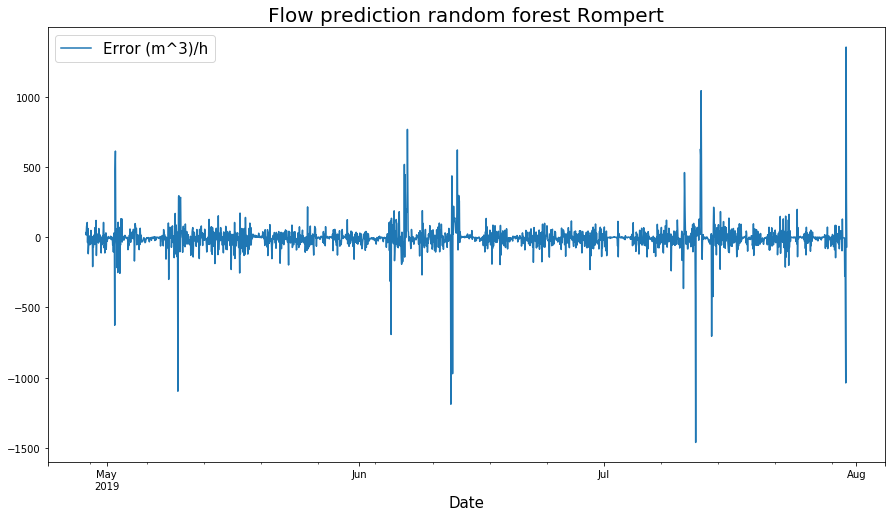

In [153]:
visualize_mse(valid_rompert, 'Rompert')
#whole_rompert['2019-05-03 16:00:00' : '2019-07-30 20:00:00'].plot()

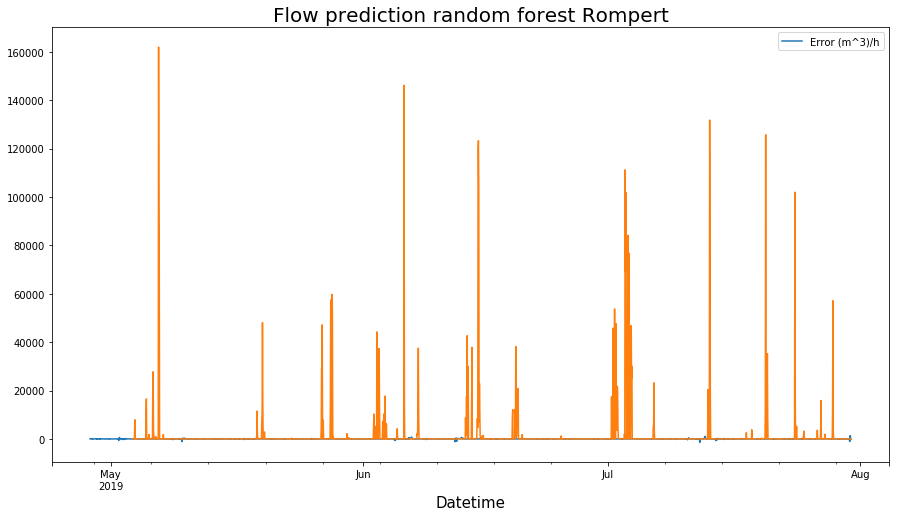

In [154]:
f, ax = plt.subplots(1)
visualize_mse(valid_rompert, 'Rompert')
whole_rompert['2019-05-03 16:00:00' : '2019-07-30 20:00:00'].plot()

In [155]:
mse(valid_rompert)

31.94909263568747

In [156]:
visualize(valid_bokhoven, 'Bokhoven')

NameError: name 'valid_bokhoven' is not defined

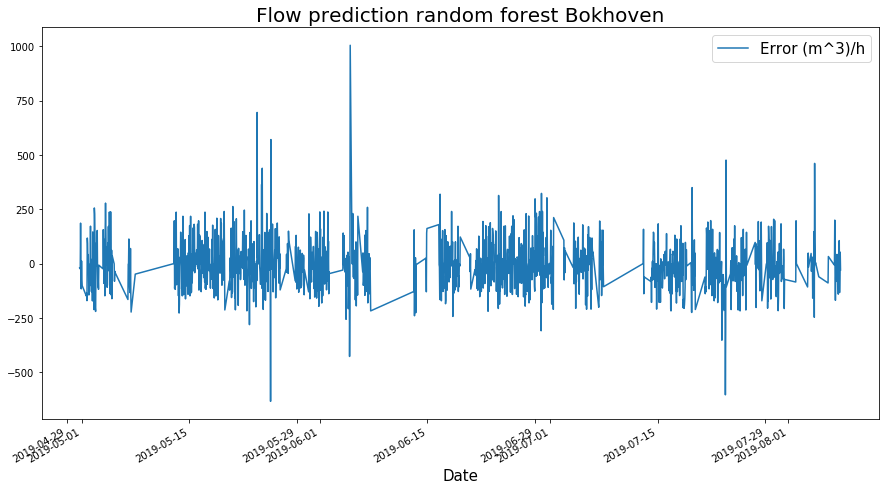

In [125]:
visualize_mse(valid_bokhoven, 'Bokhoven')

In [44]:
mse(valid_bokhoven)

5.167421873218262

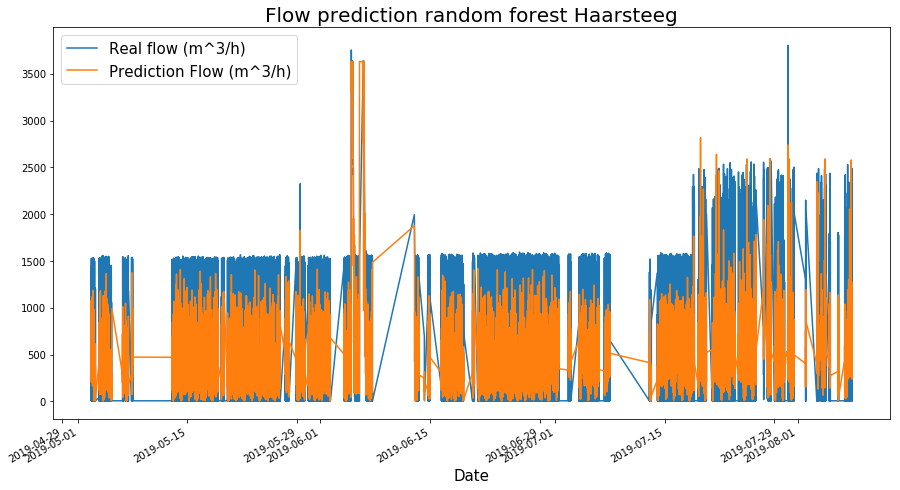

In [23]:
visualize(valid_haarsteeg, 'Haarsteeg')

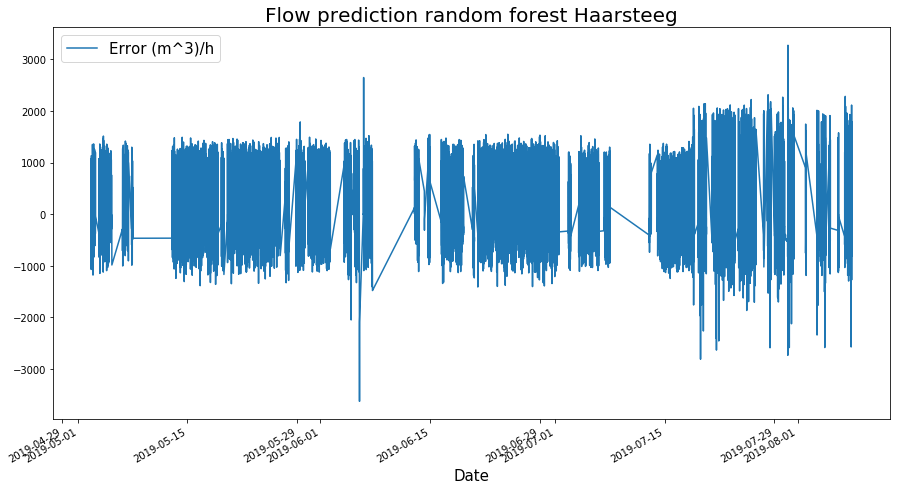

In [52]:
visualize_mse(valid_haarsteeg, 'Haarsteeg')

In [45]:
mse(valid_haarsteeg)

635.5325675632622

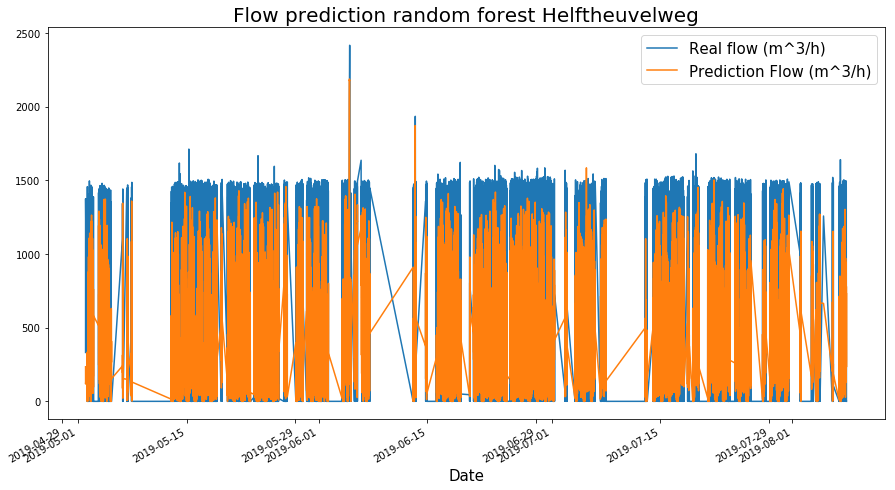

In [26]:
visualize(valid_helftheuvelweg, 'Helftheuvelweg')

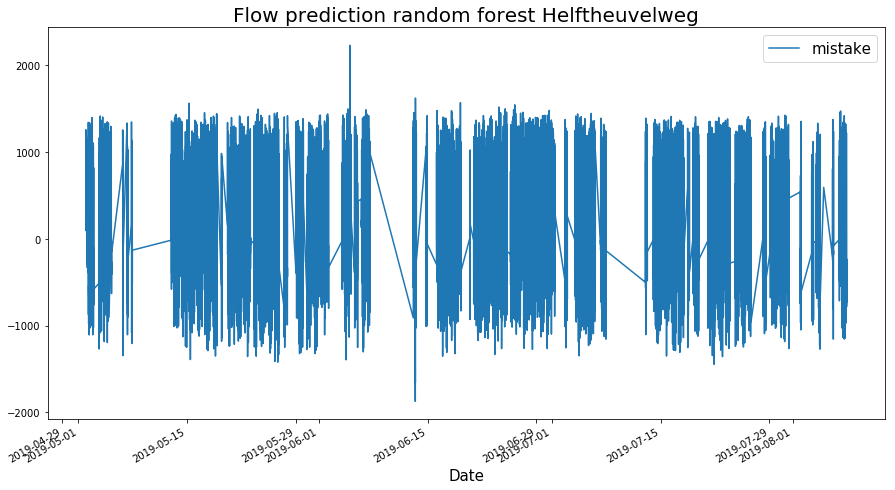

In [27]:
visualize_mse(valid_helftheuvelweg, 'Helftheuvelweg')

In [46]:
mse(valid_helftheuvelweg)

584.7104829136214

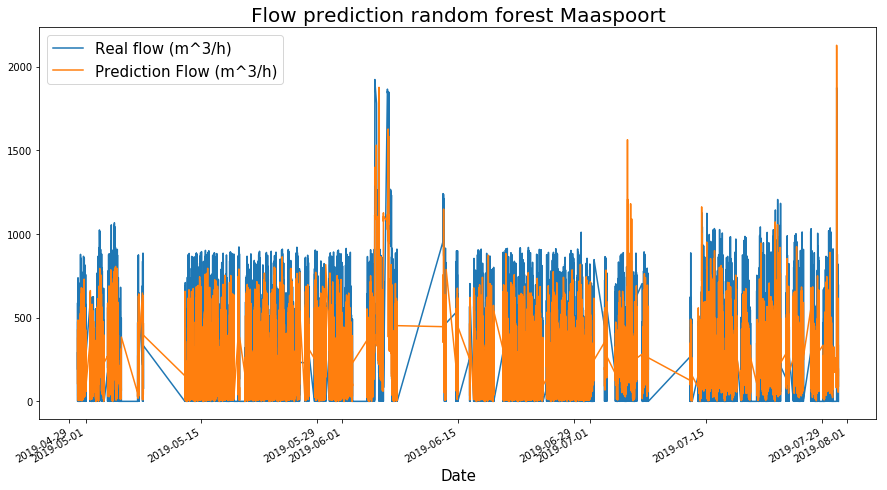

In [29]:
visualize(valid_maaspoort, 'Maaspoort')

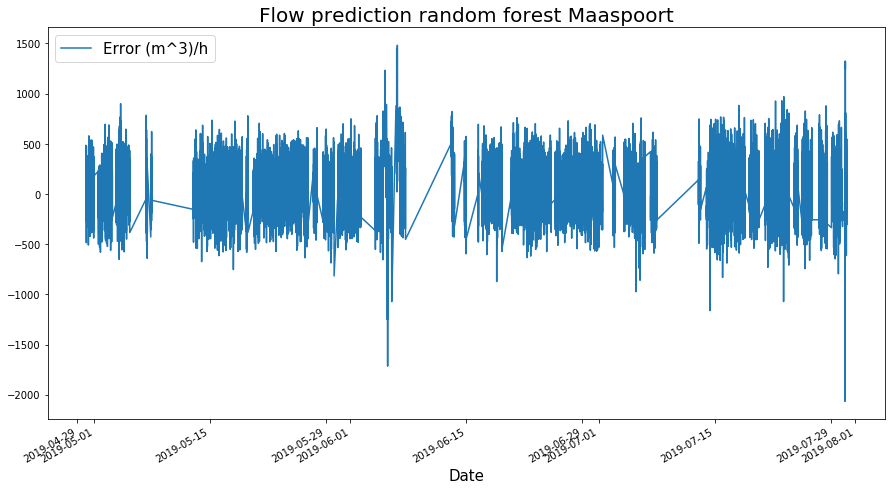

In [53]:
visualize_mse(valid_maaspoort, 'Maaspoort')

In [47]:
mse(valid_maaspoort)

243.20545580964304

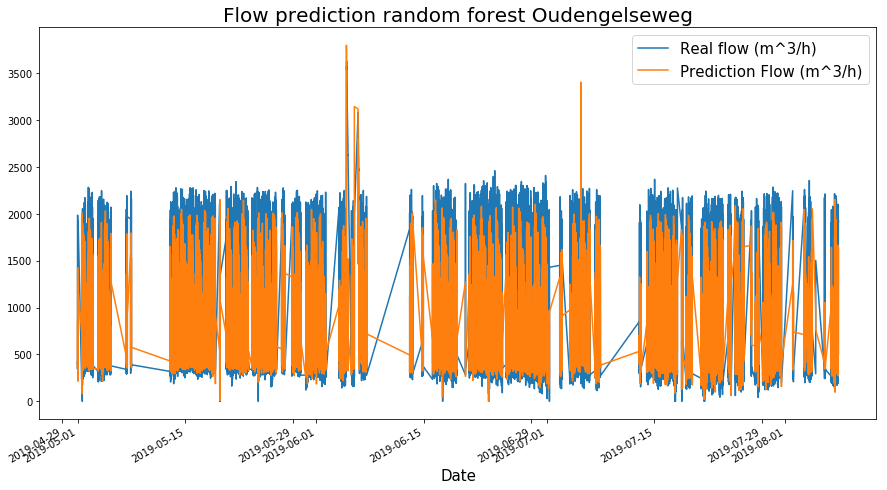

In [32]:
visualize(valid_oudengelseweg, 'Oudengelseweg')

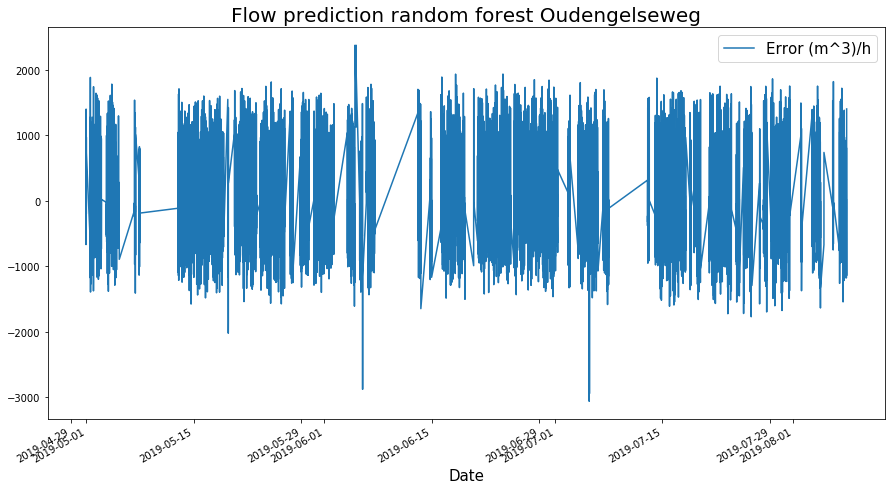

In [54]:
visualize_mse(valid_oudengelseweg, 'Oudengelseweg')

In [48]:
mse(valid_oudengelseweg)

590.6588709930832

#### OLD

In [66]:
X = (de_rompert3.drop(['de_rompert'], axis = 1))
y = (de_rompert3['de_rompert'])
    
X_train = X.iloc[:round(0.8*len(X)),:]
y_train = y.iloc[:round(0.8*len(y))]            
    
X_test = X.iloc[round(0.8*len(X)):,:]  
y_test = y.iloc[round(0.8*len(y)):]     

In [78]:
RF_Model = RandomForestRegressor(n_estimators=200, max_features=34, oob_score=True)

In [79]:
labels = y_train#[:, None]
features = X_train

rgr=RF_Model.fit(features, labels)


In [80]:
X_test_predict2 = rgr.predict(X_test)
validation = pd.DataFrame(X_test_predict2, y_test).reset_index().rename(columns = {'de_rompert':'Real flow (m^3/h)', 0:'Prediction Flow (m^3/h)'})

validation = validation.set_index(X_test.index)


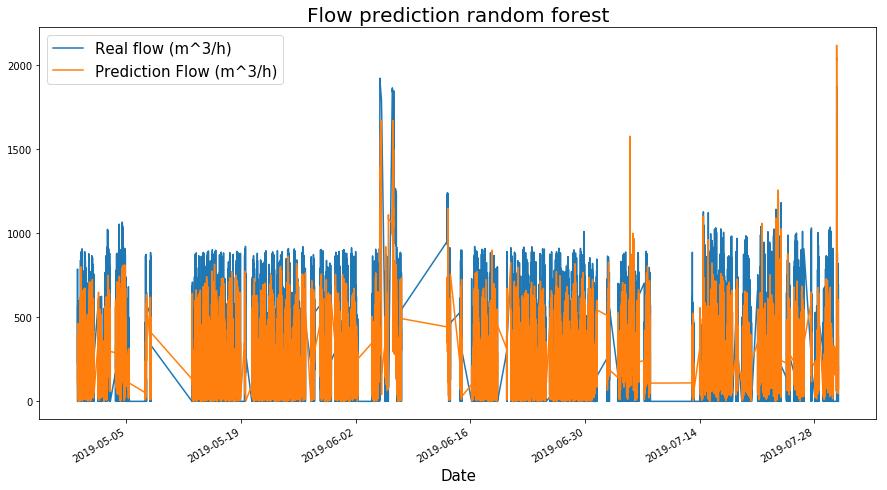

In [81]:
ax = validation.plot(figsize=(15,8))
ax.set_title('Flow prediction random forest', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})

In [37]:
validation.columns

Index(['Real flow (m^3/h)', 'Prediction Flow (m^3/h)'], dtype='object')

In [82]:
np.sqrt(mean_squared_error(validation['Real flow (m^3/h)'], validation['Prediction Flow (m^3/h)']))

240.5612742506807

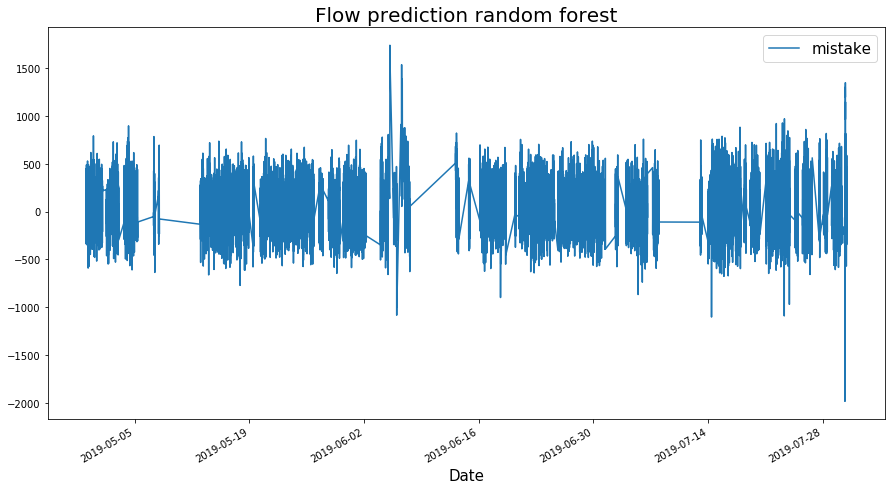

In [83]:
validation['mistake'] = (validation['Real flow (m^3/h)'] - validation['Prediction Flow (m^3/h)'])
ax2 = validation['mistake'].plot(figsize = (15,8))
ax2.set_title('Flow prediction random forest', size = 20)
ax2.set_xlabel('Date', size = 15)
ax2.legend(prop={'size': 15})

#### Time series analysis

In [ ]:
# de_rompert_series = de_rompert['interaction']
# bokhoven_series = bokhoven['interaction']
# haarsteeg_series = haarsteeg['interaction']
# helftheuvelweg_series = helftheuvelweg['interaction']
# maaspoort_series = maaspoort['interaction']
# oud_engelseweg_series = oud_engelseweg['interaction']


In [ ]:
# dry = de_rompert[de_rompert['dry'] == 1]
# dry = dry[dry['de_rompert'] != 0]
# dry = dry.groupby(pd.TimeGrouper('D'))

# data = pd.DataFrame()
# for i, j in dry:
#     if len(j) == 288:
#         data = data.append(j)
# data['de_rompert'].plot()

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR


train = de_rompert[:int(0.8*(len(de_rompert)))]
valid = de_rompert[int(0.8*(len(de_rompert))):]


In [ ]:
len(train[train['de_rompert'].isna()])


# model = VAR(endog=train)
# model_fit = model.fit()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


In [ ]:

plot_acf(series, lags = 10)
plt.xlim(0,10)
plt.ylim(0, 1)
pyplot.show()

plot_pacf(series, lags = 10)
plt.xlim(0,10)
plt.ylim(0, 1)
pyplot.show()

In [ ]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARMAResults
print(ARMAResults.summary())

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(y)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq = 1)
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue